In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
aapl_raw_data = pd.read_csv('aapl_cp_3108_0109_2022.csv')


In [31]:
aapl_raw_data

,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,...,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,index_flag,issuer,div_convention,exercise_style,am_set_flag
0,31/08/2022,02/09/2022,C,100000,56.60,58.75,0,10,3.388519,0.973216,...,0,100,0,NaN,w,0,APPLE INC,NaN,A,NaN
1,31/08/2022,02/09/2022,C,105000,51.75,53.75,0,23,3.163562,0.967252,...,0,100,0,NaN,w,0,APPLE INC,NaN,A,NaN
2,31/08/2022,02/09/2022,C,110000,46.75,48.75,0,10,2.851942,0.963936,...,0,100,0,NaN,w,0,APPLE INC,NaN,A,NaN
3,31/08/2022,02/09/2022,C,115000,41.05,43.80,0,21,2.133457,0.980325,...,0,100,0,NaN,w,0,APPLE INC,NaN,A,NaN
4,31/08/2022,02/09/2022,C,120000,36.80,37.95,76,156,1.789932,0.982432,...,0,100,0,NaN,w,0,APPLE INC,NaN,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,01/09/2022,21/06/2024,P,75000,2.04,2.11,12,288,0.421605,-0.045128,...,0,100,0,NaN,NaN,0,APPLE INC,NaN,A,NaN
3642,01/09/2022,21/06/2024,P,80000,2.51,2.57,0,2797,0.412869,-0.054715,...,0,100,0,NaN,NaN,0,APPLE INC,NaN,A,NaN
3643,01/09/2022,21/06/2024,P,85000,3.05,3.15,1,1137,0.405498,-0.065843,...,0,100,0,NaN,NaN,0,APPLE INC,NaN,A,NaN
3644,01/09/2022,21/06/2024,P,90000,3.65,3.75,14,1334,0.397119,-0.077878,...,0,100,0,NaN,NaN,0,APPLE INC,NaN,A,NaN


In [32]:

aapl_raw_data['bid_offer_midpont'] = (aapl_raw_data['best_bid'] + aapl_raw_data['best_offer']) / 2


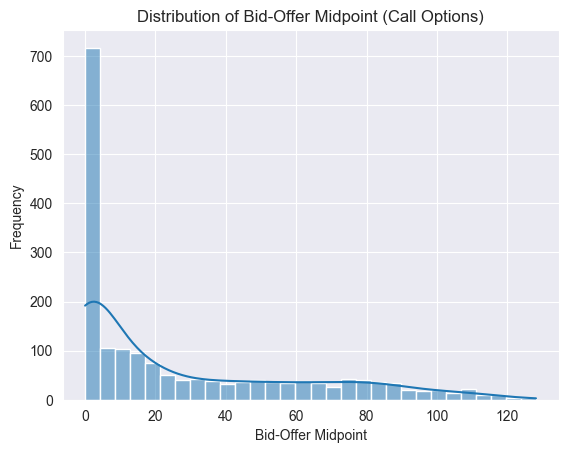

In [33]:

sns.histplot(aapl_raw_data[aapl_raw_data['cp_flag'] == 'C']['bid_offer_midpont'], bins=30, kde=True)
plt.title('Distribution of Bid-Offer Midpoint (Call Options)')
plt.xlabel('Bid-Offer Midpoint')
plt.ylabel('Frequency')
plt.show()


In [34]:
aapl_raw_data['bid_offer_midpont_log'] = np.log(aapl_raw_data['bid_offer_midpont'])

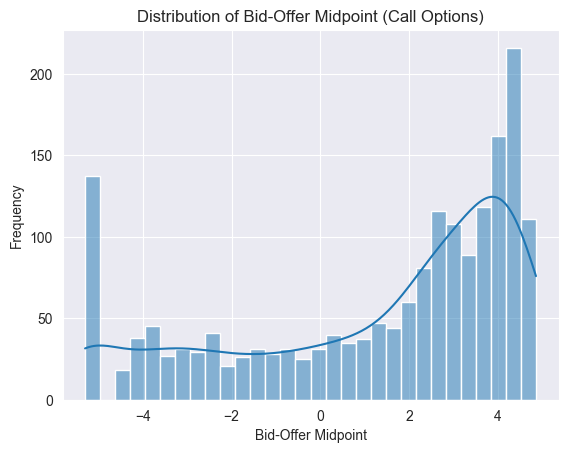

In [35]:
sns.histplot(aapl_raw_data[aapl_raw_data['cp_flag'] == 'C']['bid_offer_midpont_log'], bins=30, kde=True)
plt.title('Distribution of Bid-Offer Midpoint (Call Options)')
plt.xlabel('Bid-Offer Midpoint')
plt.ylabel('Frequency')
plt.show()

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [41]:

df = aapl_raw_data
# Convert date to 'yyyy-mm-dd' format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

# Fetch historical AAPL stock prices
ticker = 'AAPL'
start_date = df['date'].min()  # Earliest date in df
print(start_date)
end_date = df['date'].max()    # Latest date in df
# Add one day to the end date
end_date = pd.to_datetime(end_date) + pd.Timedelta(days=1)

aapl_data = yf.download(ticker, start=start_date, end=end_date)

# Extract closing prices
underlying_prices = aapl_data['Close']

[*********************100%***********************]  1 of 1 completed

2022-08-31


In [51]:
underlying_prices.head()
# Print the column names of the underlying_prices dataframe
print(underlying_prices.columns)
print(df.columns)

Index(['AAPL'], dtype='object', name='Ticker')
Index(['date', 'exdate', 'cp_flag', 'strike_price', 'best_bid', 'best_offer',
       'volume', 'open_interest', 'impl_volatility', 'delta', 'gamma', 'vega',
       'theta', 'optionid', 'cfadj', 'am_settlement', 'contract_size',
       'ss_flag', 'forward_price', 'expiry_indicator', 'index_flag', 'issuer',
       'div_convention', 'exercise_style', 'am_set_flag', 'bid_offer_midpont',
       'bid_offer_midpont_log', 'underlying_price',
       'strike_to_underlying_ratio'],
      dtype='object')


In [52]:
# For each row in the df dataframe, assign underlying_price from the underlying_prices dataframe matching the 'date' to the entry in the underlying_prices dataset

df['underlying_price'] = df['date'].map(underlying_prices.squeeze())

In [53]:


# Compute the ratio
df['strike_to_underlying_ratio'] = df['strike_price'] / (df['underlying_price']*1000)

print(df[['date','strike_price','underlying_price','strike_to_underlying_ratio']].head())

         date  strike_price  underlying_price  strike_to_underlying_ratio
0  2022-08-31        100000        155.326233                    0.643806
1  2022-08-31        105000        155.326233                    0.675997
2  2022-08-31        110000        155.326233                    0.708187
3  2022-08-31        115000        155.326233                    0.740377
4  2022-08-31        120000        155.326233                    0.772568


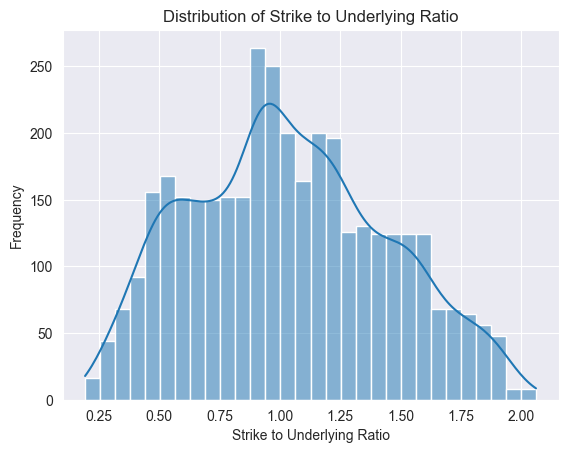

In [54]:
sns.histplot(df['strike_to_underlying_ratio'], bins=30, kde=True)
plt.title('Distribution of Strike to Underlying Ratio')
plt.xlabel('Strike to Underlying Ratio')
plt.ylabel('Frequency')
plt.show()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,...,expiry_indicator,index_flag,issuer,div_convention,exercise_style,am_set_flag,bid_offer_midpont,bid_offer_midpont_log,underlying_price,strike_to_underlying_ratio
0,2022-08-31,02/09/2022,C,100000,56.60,58.75,0,10,3.388519,0.973216,...,w,0,APPLE INC,NaN,A,NaN,57.675,4.054824,None,NaN
1,2022-08-31,02/09/2022,C,105000,51.75,53.75,0,23,3.163562,0.967252,...,w,0,APPLE INC,NaN,A,NaN,52.750,3.965564,None,NaN
2,2022-08-31,02/09/2022,C,110000,46.75,48.75,0,10,2.851942,0.963936,...,w,0,APPLE INC,NaN,A,NaN,47.750,3.865979,None,NaN
3,2022-08-31,02/09/2022,C,115000,41.05,43.80,0,21,2.133457,0.980325,...,w,0,APPLE INC,NaN,A,NaN,42.425,3.747738,None,NaN
4,2022-08-31,02/09/2022,C,120000,36.80,37.95,76,156,1.789932,0.982432,...,w,0,APPLE INC,NaN,A,NaN,37.375,3.621002,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,2022-09-01,21/06/2024,P,75000,2.04,2.11,12,288,0.421605,-0.045128,...,NaN,0,APPLE INC,NaN,A,NaN,2.075,0.729961,None,NaN
3642,2022-09-01,21/06/2024,P,80000,2.51,2.57,0,2797,0.412869,-0.054715,...,NaN,0,APPLE INC,NaN,A,NaN,2.540,0.932164,None,NaN
3643,2022-09-01,21/06/2024,P,85000,3.05,3.15,1,1137,0.405498,-0.065843,...,NaN,0,APPLE INC,NaN,A,NaN,3.100,1.131402,None,NaN
3644,2022-09-01,21/06/2024,P,90000,3.65,3.75,14,1334,0.397119,-0.077878,...,NaN,0,APPLE INC,NaN,A,NaN,3.700,1.308333,None,NaN
